In [1]:
!pip install --force-reinstall "scikit-learn==1.0.2"

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl (17 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.3.0
    Uninstalling threadpoolctl-3.3.0:
      Successfully uninstalled threadpoolctl-3.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

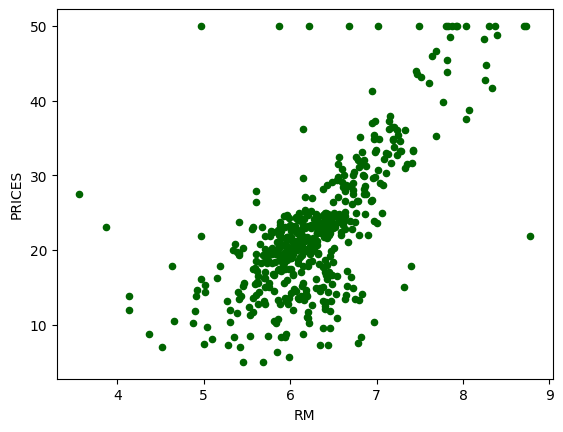

In [3]:
# загрузка даннных
boston_dataset = load_boston()

df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston["PRICES"] = boston_dataset.target
print(df_boston.head(20))


df_boston.plot.scatter(x='RM',y='PRICES', c='DarkGreen')
plt.xlabel("RM")
plt.ylabel("PRICES")
plt.show()

TargetColumn = "PRICES"
FeatureColumns = ["CRIM",'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE',"DIS",'RAD','TAX','PTRATIO','B','LSTAT']





In [4]:
X = df_boston[FeatureColumns]
Y = df_boston[TargetColumn]

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=99)


In [5]:
# Ковертиция данных  в тензора Pytorch
x_train_tensor = torch.tensor(np.array(X_train), dtype=torch.float)
y_train_tensor = torch.tensor(np.array(Y_train).reshape(-1, 1), dtype=torch.float)

class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.linear_layer1 = nn.Linear(X.shape[1], 16)
            self.linear_layer2 = nn.Linear(16, 8)
            self.linear_layer3 = nn.Linear(8, 1)

        def forward(self, x):
            x = F.relu( self.linear_layer1(x) )
            x = F.relu( self.linear_layer2(x) )
            x = self.linear_layer3(x)
            return x
model = NeuralNetwork()
print(model)


NeuralNetwork(
  (linear_layer1): Linear(in_features=13, out_features=16, bias=True)
  (linear_layer2): Linear(in_features=16, out_features=8, bias=True)
  (linear_layer3): Linear(in_features=8, out_features=1, bias=True)
)


epoch: 0,loss: 573.47675
epoch: 20,loss: 25.63812
epoch: 40,loss: 16.26321
epoch: 60,loss: 13.96828
epoch: 80,loss: 12.61239
epoch: 100,loss: 11.63607
epoch: 120,loss: 10.96952
epoch: 140,loss: 10.48220
epoch: 160,loss: 10.07051
epoch: 180,loss: 9.71595
epoch: 200,loss: 9.40531
epoch: 220,loss: 9.12797
epoch: 240,loss: 8.86822
epoch: 260,loss: 8.62245
epoch: 280,loss: 8.38620
R2=0.8179834709166595


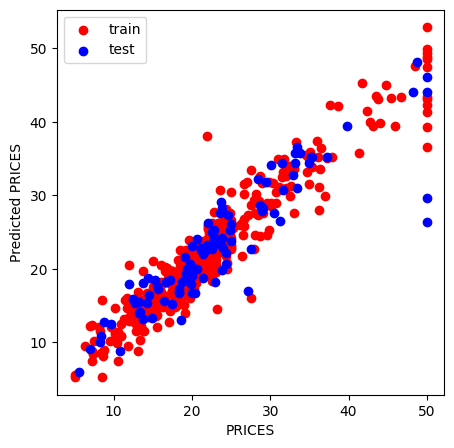

In [6]:
# оптимизатор
optimizer = optim.SGD(model.parameters(), lr=0.003)
# описываем функцию потерь
loss_function = nn.MSELoss()
# задаем количество эпох обучения
epochs_count = 300
for i in range(epochs_count):
    optimizer.zero_grad() # инициализируем градиенты
    y_val = model(x_train_tensor) # вычисляем ошибку НС
    loss = loss_function(y_val, y_train_tensor)
    loss.backward() # выполняем обратное распространиение ошибки
    optimizer.step()    # обновляем параметры НС
    if (i % 20) == 0:    # на каждом 20м шаге выводим информацию об ошибке
      print('epoch: {},'.format(i) + 'loss: {:.5f}'.format(loss))

# Прогноз на обучающей и тестовой выборке
Y_train_pred = model(torch.tensor(X_train, dtype=torch.float))
# Прогноз на  выборке
Y_test_pred = model(torch.tensor(X_test, dtype=torch.float))

# Конвертация тензоров в numpy массивы
Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

#вычисляем коэффициент детерминации R2 для оценки качества модели
R2 = r2_score(Y_test, Y_test_pred)
print('R2={}'.format(R2))

#графическое отображение результатов

plt.figure(figsize=(5, 5), dpi=100)
plt.xlabel("PRICES")
plt.ylabel("Predicted PRICES")
plt.scatter(Y_train, Y_train_pred, lw=1, color="r", label="train")
plt.scatter(Y_test, Y_test_pred, lw=1, color="b", label="test")
plt.legend()
plt.show()